**UNSUPERVISED LEARNING - CLUSTERING**

We converted the extracted features in the previous parts of the project into csv files, to be able to see the results faster. The csv files are also attached.

In [ ]:
from google.colab import drive
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
drive.mount('/content/drive')
features = np.loadtxt(fname='/content/drive/MyDrive/ml/features_total.csv',delimiter=',')
emotions = np.loadtxt(fname='/content/drive/MyDrive/ml/emotions.csv',delimiter=',',dtype= str)
genders = np.loadtxt(fname='/content/drive/MyDrive/ml/gender.csv',delimiter=',',dtype= str)
text_ID = np.loadtxt(fname='/content/drive/MyDrive/ml/textID.csv',delimiter=',')

Mounted at /content/drive


DBSCAN ALGORITHM:

first we find the best epsilon to put as a parameter in the dbscan algorithm:

Text(0, 0.5, 'Distance')

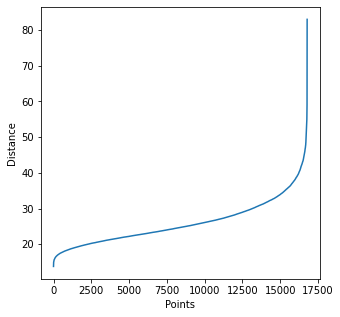

In [ ]:
#finding best epsilon using knn algorithm

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(features)

distances, indices = neighbors.kneighbors(features)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
best epsilon = 32.54772605754776


<Figure size 360x360 with 0 Axes>

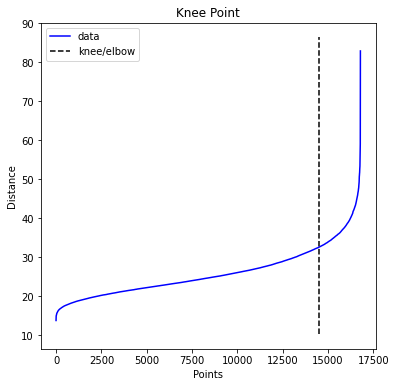

In [ ]:
!pip install kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("best epsilon =",distances[knee.knee])

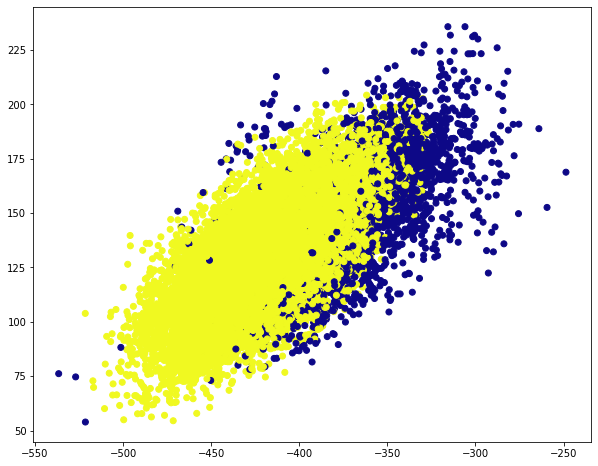

In [ ]:
dbscan = DBSCAN(eps = 33, min_samples = 124).fit(features) 
dbscan_labels = dbscan.labels_
plt.subplots(figsize=(10,8))
plt.scatter(features[:, 0], features[:,1], c = dbscan_labels, cmap= "plasma")
plt.show()

HDBSCAN ALGORITHM:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


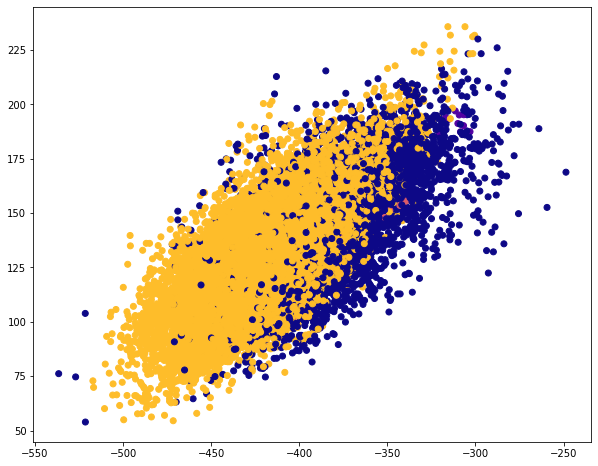

In [ ]:
#num of clusters 2
!pip install hdbscan
import hdbscan
Hdbscan2 = hdbscan.HDBSCAN(min_cluster_size = 2, min_samples = 10).fit(features) 
hdbscan2_labels = Hdbscan2.labels_
plt.subplots(figsize=(10,8))
plt.scatter(features[:, 0], features[:,1], c = hdbscan2_labels, cmap= "plasma")
plt.show()

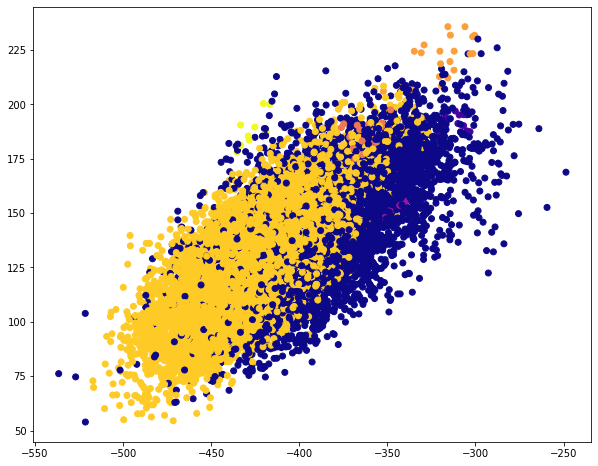

In [ ]:
#num of clusters 4
Hdbscan4 = hdbscan.HDBSCAN(min_cluster_size = 4, min_samples = 8).fit(features) 
hdbscan4_labels = Hdbscan4.labels_
plt.subplots(figsize=(10,8))
plt.scatter(features[:, 0], features[:,1], c = hdbscan4_labels, cmap= "plasma")
plt.show()

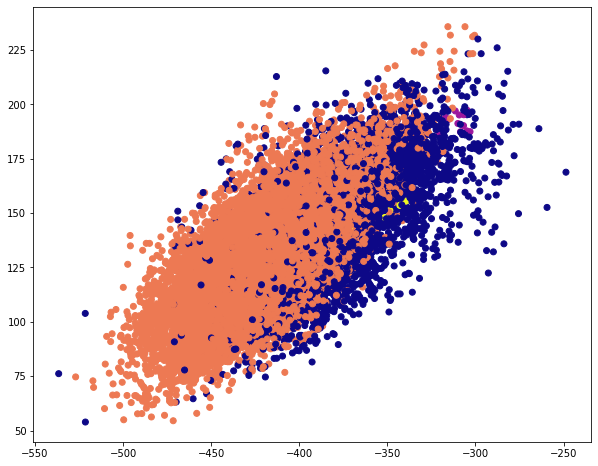

In [ ]:
#num of clusters 10
Hdbscan10 = hdbscan.HDBSCAN(min_cluster_size = 10, min_samples = 8).fit(features) 
hdbscan10_labels = Hdbscan10.labels_
plt.subplots(figsize=(10,8))
plt.scatter(features[:, 0], features[:,1], c = hdbscan10_labels, cmap= "plasma")
plt.show()

KMEANS ALGORITHM:

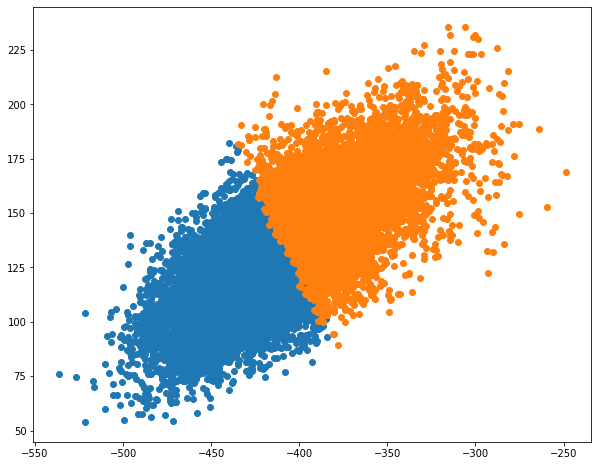

In [ ]:
#for num of clusters = 2 
Kmeans2_model = KMeans(n_clusters= 2, random_state= 42)
Kmeans2_pred = Kmeans2_model.fit_predict(features)
clusters_kmeans2 = unique(Kmeans2_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans2:
    row_ix = where(Kmeans2_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

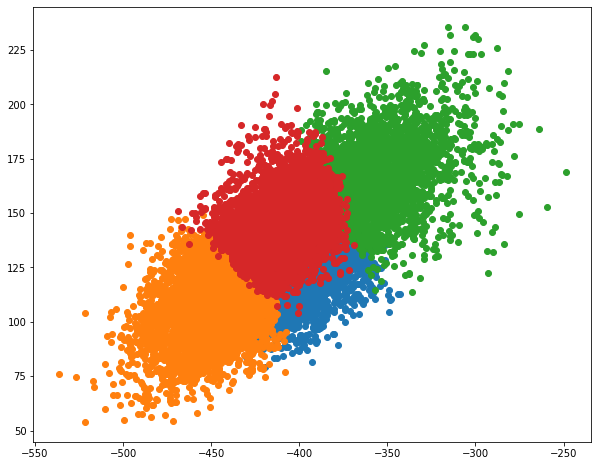

In [ ]:
#for num of clusters = 4
Kmeans4_model = KMeans(n_clusters= 4, random_state= 42)
Kmeans4_pred = Kmeans4_model.fit_predict(features)
clusters_kmeans4 = unique(Kmeans4_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans4:
    row_ix = where(Kmeans4_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

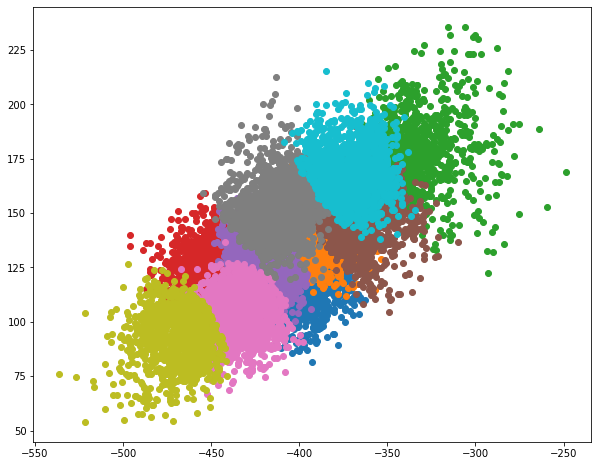

In [ ]:
#for num of clusters = 10
Kmeans10_model = KMeans(n_clusters= 10, random_state= 42)
Kmeans10_pred = Kmeans10_model.fit_predict(features)
clusters_kmeans10 = unique(Kmeans10_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans10:
    row_ix = where(Kmeans10_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

GMM ALGORITHM:

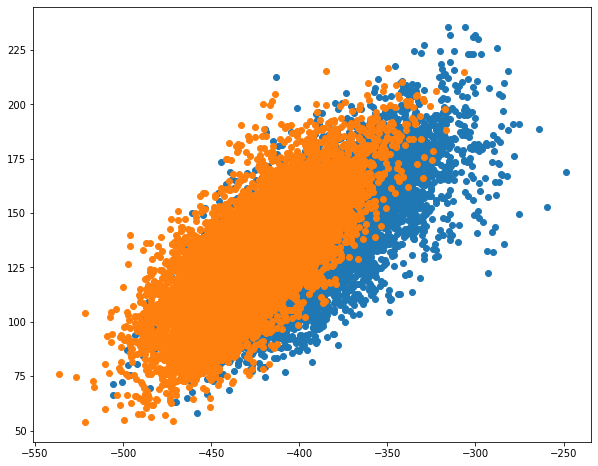

In [ ]:
#for num of clusters = 2
GMM2_model = GaussianMixture(n_components=2)
GMM2_pred = GMM2_model.fit_predict(features)
clusters_GMM2 = unique(GMM2_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM2:
    row_ix = where(GMM2_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

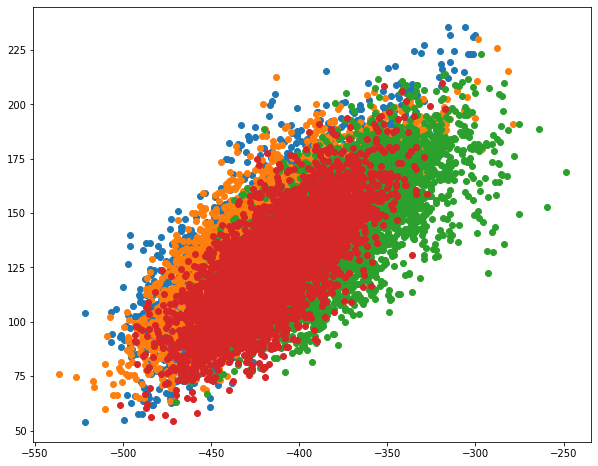

In [ ]:
#for num of clusters = 4
GMM4_model = GaussianMixture(n_components=4)
GMM4_pred = GMM4_model.fit_predict(features)
clusters_GMM4 = unique(GMM4_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM4:
    row_ix = where(GMM4_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

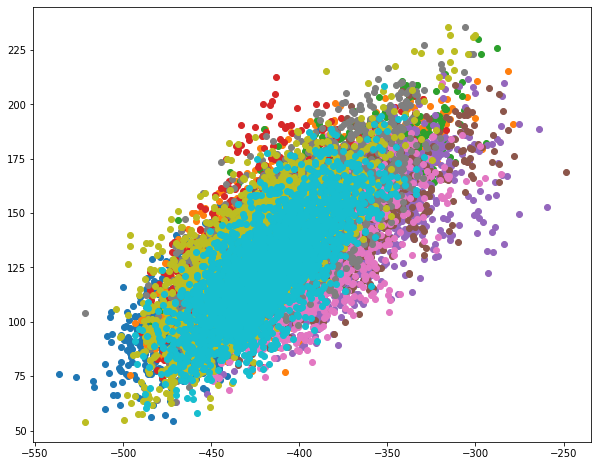

In [ ]:
#for num of clusters = 10
GMM10_model = GaussianMixture(n_components=10)
GMM10_pred = GMM10_model.fit_predict(features)
clusters_GMM10 = unique(GMM10_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM10:
    row_ix = where(GMM10_pred == cluster)
    plt.scatter(features[row_ix, 0], features[row_ix, 1])
plt.show()

EVALUATION METRICS

Extrincit Measures:

In [ ]:
#silhouette score of the models:
print("silhouette score of dbscan:", metrics.silhouette_score(features,dbscan_labels))
print("silhouette score of hdbscan 2:", metrics.silhouette_score(features,hdbscan2_labels))
print("silhouette score of hdbscan 4:", metrics.silhouette_score(features,hdbscan4_labels))
print("silhouette score of hdbscan 10:", metrics.silhouette_score(features,hdbscan10_labels))
print("silhouette score of kmeans 2:", metrics.silhouette_score(features,Kmeans2_pred))
print("silhouette score of kmeans 4:", metrics.silhouette_score(features,Kmeans4_pred))
print("silhouette score of kmeans 10:", metrics.silhouette_score(features,Kmeans10_pred))
print("silhouette score of GMM 2:", metrics.silhouette_score(features,GMM2_pred))
print("silhouette score of GMM 4:", metrics.silhouette_score(features,GMM4_pred))
print("silhouette score of GMM 10:", metrics.silhouette_score(features,GMM10_pred))

silhouette score of dbscan: 0.28480473473081136
silhouette score of hdbscan 2: -0.036434168163789166
silhouette score of hdbscan 4: -0.034726678505026
silhouette score of hdbscan 10: 0.16306882711458648
silhouette score of kmeans 2: 0.2847176600287628
silhouette score of kmeans 4: 0.1896206009691554
silhouette score of kmeans 10: 0.10948630543611307
silhouette score of GMM 2: 0.09910263590870982
silhouette score of GMM 4: -0.006219543998652198
silhouette score of GMM 10: -0.07276504025055822


In [ ]:
# calinski harabasz score of the models:
print("calinski harabasz score of dbscan:", metrics.calinski_harabasz_score(features,dbscan_labels))
print("calinski harabasz score of hdbscan 2:", metrics.calinski_harabasz_score(features,hdbscan2_labels))
print("calinski harabasz score of hdbscan 4:", metrics.calinski_harabasz_score(features,hdbscan4_labels))
print("calinski harabasz score of hdbscan 10:", metrics.calinski_harabasz_score(features,hdbscan10_labels))
print("calinski harabasz score of kmeans 2:", metrics.calinski_harabasz_score(features,Kmeans2_pred))
print("calinski harabasz score of kmeans 4:", metrics.calinski_harabasz_score(features,Kmeans4_pred))
print("calinski harabasz score of kmeans 10:", metrics.calinski_harabasz_score(features,Kmeans10_pred))
print("calinski harabasz score of GMM 2:", metrics.calinski_harabasz_score(features,GMM2_pred))
print("calinski harabasz score of GMM 4:", metrics.calinski_harabasz_score(features,GMM4_pred))
print("calinski harabasz score of GMM 10:", metrics.calinski_harabasz_score(features,GMM10_pred))

calinski harabasz score of dbscan: 2998.0390602501043
calinski harabasz score of hdbscan 2: 424.94116870181324
calinski harabasz score of hdbscan 4: 388.4098079172661
calinski harabasz score of hdbscan 10: 961.0191902267044
calinski harabasz score of kmeans 2: 9201.838922850844
calinski harabasz score of kmeans 4: 5886.817015205034
calinski harabasz score of kmeans 10: 3157.621357627711
calinski harabasz score of GMM 2: 2356.642133715847
calinski harabasz score of GMM 4: 899.3276383209715
calinski harabasz score of GMM 10: 477.028641364578


In [ ]:
# davies bouldin score of the models:
print("davies bouldin score of dbscan:", metrics.davies_bouldin_score(features,dbscan_labels))
print("davies bouldin score of hdbscan 2:", metrics.davies_bouldin_score(features,hdbscan2_labels))
print("davies bouldin score of hdbscan 4:", metrics.davies_bouldin_score(features,hdbscan4_labels))
print("davies bouldin score of hdbscan 10:", metrics.davies_bouldin_score(features,hdbscan10_labels))
print("davies bouldin score of kmeans 2:", metrics.davies_bouldin_score(features,Kmeans2_pred))
print("davies bouldin score of kmeans 4:", metrics.davies_bouldin_score(features,Kmeans4_pred))
print("davies bouldin score of kmeans 10:", metrics.davies_bouldin_score(features,Kmeans10_pred))
print("davies bouldin score of GMM 2:", metrics.davies_bouldin_score(features,GMM2_pred))
print("davies bouldin score of GMM 4:", metrics.davies_bouldin_score(features,GMM4_pred))
print("davies bouldin score of GMM 10:", metrics.davies_bouldin_score(features,GMM10_pred))

davies bouldin score of dbscan: 1.6336997476543926
davies bouldin score of hdbscan 2: 1.5231242358494455
davies bouldin score of hdbscan 4: 1.3769497878386594
davies bouldin score of hdbscan 10: 1.6806300722700183
davies bouldin score of kmeans 2: 1.2852571156938792
davies bouldin score of kmeans 4: 1.5740225167219135
davies bouldin score of kmeans 10: 1.8348467424439607
davies bouldin score of GMM 2: 2.4990362917528923
davies bouldin score of GMM 4: 6.659902754116131
davies bouldin score of GMM 10: 5.650554898248412


Extrinsic Measures:

In [ ]:
#rand index for models:
print("rand index of dbscan:", metrics.adjusted_rand_score(genders,dbscan_labels))
print("rand index of hdbscan 2:", metrics.adjusted_rand_score(genders,hdbscan2_labels))
print("rand index of hdbscan 4:", metrics.adjusted_rand_score(genders,hdbscan4_labels))
print("rand index of hdbscan 10:", metrics.adjusted_rand_score(genders,hdbscan10_labels))
print("rand index of kmeans 2:", metrics.adjusted_rand_score(genders,Kmeans2_pred))
print("rand index of kmeans 4:", metrics.adjusted_rand_score(emotions,Kmeans4_pred))
print("rand index of kmeans 10:", metrics.adjusted_rand_score(text_ID,Kmeans10_pred))
print("rand index of GMM 2:", metrics.adjusted_rand_score(genders,GMM2_pred))
print("rand index of GMM 4:", metrics.adjusted_rand_score(emotions,GMM4_pred))
print("rand index of GMM 10:", metrics.adjusted_rand_score(text_ID,GMM10_pred))

rand index of dbscan: 0.01460115950154463
rand index of hdbscan 2: 0.02951996431899755
rand index of hdbscan 2: 0.050799873452305896
rand index of hdbscan 2: 0.02541355941770397
rand index of kmeans 2: 0.009089499243896296
rand index of kmeans 4: 0.02129346124346133
rand index of kmeans 10: 0.005656728145904376
rand index of GMM 2: 0.056964875164928964
rand index of GMM 4: 0.0072834213263010044
rand index of GMM 10: 0.0036994556474662524


In [ ]:
#Mutual Information score for models:
print("mutual information score of dbscan:", metrics.mutual_info_score(genders,dbscan_labels))
print("mutual information score of hdbscan 2:", metrics.mutual_info_score(genders,hdbscan2_labels))
print("mutual information score of hdbscan 4:", metrics.adjusted_rand_score(genders,hdbscan4_labels))
print("mutual information score of hdbscan 10:", metrics.adjusted_rand_score(genders,hdbscan10_labels))
print("mutual information score of kmeans 2:", metrics.mutual_info_score(genders,Kmeans2_pred))
print("mutual information score of kmeans 4:", metrics.mutual_info_score(emotions,Kmeans4_pred))
print("mutual information score of kmeans 10:", metrics.mutual_info_score(text_ID,Kmeans10_pred))
print("mutual information score of GMM 2:", metrics.mutual_info_score(genders,GMM2_pred))
print("mutual information score of GMM 4:", metrics.mutual_info_score(emotions,GMM4_pred))
print("mutual information score of GMM 10:", metrics.mutual_info_score(text_ID,GMM10_pred))

mutual information score of dbscan: 0.010980997390407782
mutual information score of hdbscan 2: 0.018745841763565255
mutual information score of hdbscan 4: 0.050799873452305896
mutual information score of hdbscan 10: 0.02541355941770397
mutual information score of kmeans 2: 0.00435183992582544
mutual information score of kmeans 4: 0.03346738199051055
mutual information score of kmeans 10: 0.03403679708649348
mutual information score of GMM 2: 0.028407201359370582
mutual information score of GMM 4: 0.011490972970172472
mutual information score of GMM 10: 0.02008988025118535


In [ ]:
#Homogenity score for models:
print("homogenity score of dbscan:", metrics.homogeneity_score(genders,dbscan_labels))
print("homogenity score of hdbscan 2:", metrics.homogeneity_score(genders,hdbscan2_labels))
print("homogenity score of hdbscan 4:", metrics.homogeneity_score(genders,hdbscan4_labels))
print("homogenity score of hdbscan 10:", metrics.homogeneity_score(genders,hdbscan10_labels))
print("homogenity score of kmeans 2:", metrics.homogeneity_score(genders,Kmeans2_pred))
print("homogenity score of kmeans 4:", metrics.homogeneity_score(emotions,Kmeans4_pred))
print("homogenity score of kmeans 10:", metrics.homogeneity_score(text_ID,Kmeans10_pred))
print("homogenity score of GMM 2:", metrics.homogeneity_score(genders,GMM2_pred))
print("homogenity score of GMM 4:", metrics.homogeneity_score(emotions,GMM4_pred))
print("homogenity score of GMM 10:", metrics.homogeneity_score(text_ID,GMM10_pred))

homogenity score of dbscan: 0.0158561760263728
homogenity score of hdbscan 2: 0.027068339623253786
homogenity score of hdbscan 4: 0.04226229446864987
homogenity score of hdbscan 10: 0.023976978661123985
homogenity score of kmeans 2: 0.006283904589829145
homogenity score of kmeans 4: 0.02414170285445999
homogenity score of kmeans 10: 0.014748817101755225
homogenity score of GMM 2: 0.041019004845976904
homogenity score of GMM 4: 0.008289015705895178
homogenity score of GMM 10: 0.008705342299627715


In [ ]:
#v-measure score for models:
print("v-measure score of dbscan:", metrics.homogeneity_score(genders,dbscan_labels))
print("v-measure score of hdbscan 2:", metrics.homogeneity_score(genders,hdbscan2_labels))
print("v-measure score of hdbscan 4:", metrics.homogeneity_score(genders,hdbscan4_labels))
print("v-measure score of hdbscan 10:", metrics.homogeneity_score(genders,hdbscan10_labels))
print("v-measure score of kmeans 2:", metrics.homogeneity_score(genders,Kmeans2_pred))
print("v-measure score of kmeans 4:", metrics.homogeneity_score(emotions,Kmeans4_pred))
print("v-measure score of kmeans 10:", metrics.homogeneity_score(text_ID,Kmeans10_pred))
print("v-measure score of GMM 2:", metrics.homogeneity_score(genders,GMM2_pred))
print("v-measure score of GMM 4:", metrics.homogeneity_score(emotions,GMM4_pred))
print("v-measure score of GMM 10:", metrics.homogeneity_score(text_ID,GMM10_pred))

v-measure score of dbscan: 0.0158561760263728
v-measure score of hdbscan 2: 0.027068339623253786
v-measure score of hdbscan 4: 0.04226229446864987
v-measure score of hdbscan 10: 0.023976978661123985
v-measure score of kmeans 2: 0.006283904589829145
v-measure score of kmeans 4: 0.02414170285445999
v-measure score of kmeans 10: 0.014748817101755225
v-measure score of GMM 2: 0.041019004845976904
v-measure score of GMM 4: 0.008289015705895178
v-measure score of GMM 10: 0.008705342299627715


In [ ]:
print("contingency matrix for dbscan:")
sklearn.metrics.cluster.contingency_matrix(genders,dbscan_labels)


contingency matrix for dbscan:


array([[1430, 6669],
       [ 685, 8000]])

In [ ]:
print("contingency matrix for GMM 2:")
sklearn.metrics.cluster.contingency_matrix(genders,GMM2_pred)

contingency matrix for GMM 2:


array([[4801, 3298],
       [3090, 5595]])

In [ ]:
print("contingency matrix for Kmeans 2:")
sklearn.metrics.cluster.contingency_matrix(genders,Kmeans2_pred)

contingency matrix for Kmeans 2:


array([[3985, 4114],
       [5081, 3604]])

Dimension Reduction on the data with PCA algorithm:

In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(features)
reduced_features = pca.transform(features)


DBSCAN ALGORITHM:

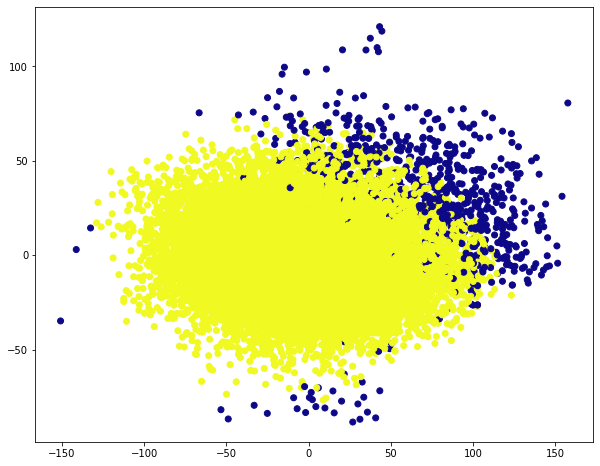

silhouette score of dbscan: 0.34714669659475655
calinski harabasz score of dbscan: 1511.5645001753876
davies bouldin score of dbscan: 1.4823861630682738


In [ ]:
dbscan_reduced = DBSCAN(eps = 33, min_samples = 124).fit(reduced_features) 
dbscan_labels_reduced = dbscan_reduced.labels_
plt.subplots(figsize=(10,8))
plt.scatter(reduced_features[:, 0], reduced_features[:,1], c = dbscan_labels_reduced, cmap= "plasma")
plt.show()
print("silhouette score of dbscan:", metrics.silhouette_score(reduced_features,dbscan_labels_reduced))
print("calinski harabasz score of dbscan:", metrics.calinski_harabasz_score(reduced_features,dbscan_labels_reduced))
print("davies bouldin score of dbscan:", metrics.davies_bouldin_score(reduced_features,dbscan_labels_reduced))

KMEANS ALGORITHM:

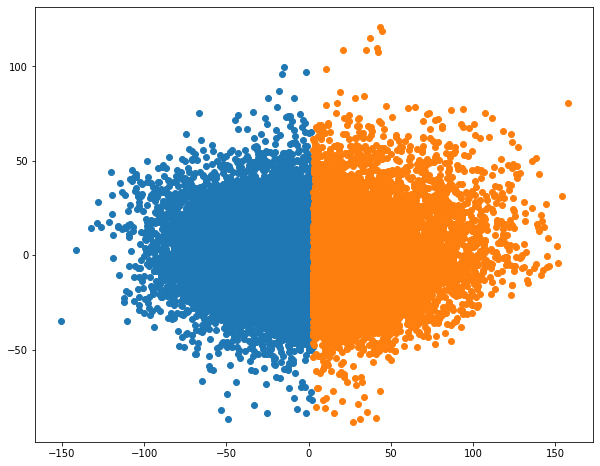

silhouette score of kmeans 2: 0.29936761998398076
calinski harabasz score of kmeans 2: 9972.451517431065
davies bouldin score of kmeans 2: 1.227230226316242


In [ ]:
Kmeans2_model_reduced = KMeans(n_clusters= 2, random_state= 42)
Kmeans2_pred_reduced = Kmeans2_model_reduced.fit_predict(reduced_features)
clusters_kmeans2_reduced = unique(Kmeans2_pred_reduced)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans2_reduced:
    row_ix = where(Kmeans2_pred_reduced == cluster)
    plt.scatter(reduced_features[row_ix, 0], reduced_features[row_ix, 1])
plt.show()
print("silhouette score of kmeans 2:", metrics.silhouette_score(reduced_features,Kmeans2_pred_reduced))
print("calinski harabasz score of kmeans 2:", metrics.calinski_harabasz_score(reduced_features,Kmeans2_pred_reduced))
print("davies bouldin score of kmeans 2:", metrics.davies_bouldin_score(reduced_features,Kmeans2_pred_reduced))

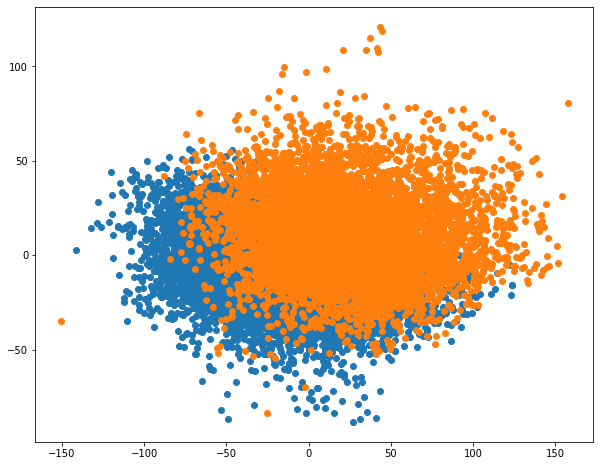

silhouette score of GMM 2: 0.1388377597378705
calinski harabasz score of GMM 2: 3020.6025068001786
davies bouldin score of GMM 2: 2.1777109026744514


In [ ]:
GMM2_model_reduced = GaussianMixture(n_components=2)
GMM2_pred_reduced = GMM2_model.fit_predict(reduced_features)
clusters_GMM2_reduced = unique(GMM2_pred_reduced)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM2_reduced:
    row_ix = where(GMM2_pred_reduced == cluster)
    plt.scatter(reduced_features[row_ix, 0], reduced_features[row_ix, 1])
plt.show()
print("silhouette score of GMM 2:", metrics.silhouette_score(reduced_features,GMM2_pred_reduced))
print("calinski harabasz score of GMM 2:", metrics.calinski_harabasz_score(reduced_features,GMM2_pred_reduced))
print("davies bouldin score of GMM 2:", metrics.davies_bouldin_score(reduced_features,GMM2_pred_reduced))

repeating the algorithms with the new features:

DBSCAN:

In [ ]:
second_features = np.loadtxt(fname='/content/drive/MyDrive/ml/features3.csv',delimiter=',')
print(len(second_features[0]))
pca = PCA(n_components = 0.95)
pca.fit(second_features)
second_features = pca.transform(second_features)
print(len(second_features[0]))

384
14


Text(0, 0.5, 'Distance')

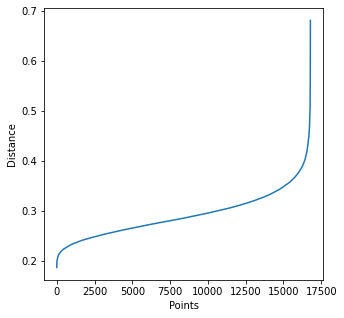

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(second_features)

distances, indices = neighbors.kneighbors(second_features)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
best epsilon = 0.3419910669668952


<Figure size 360x360 with 0 Axes>

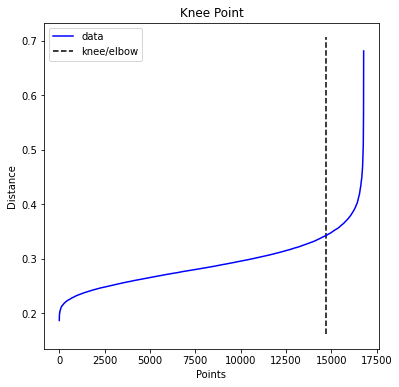

In [ ]:
!pip install kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("best epsilon =",distances[knee.knee])

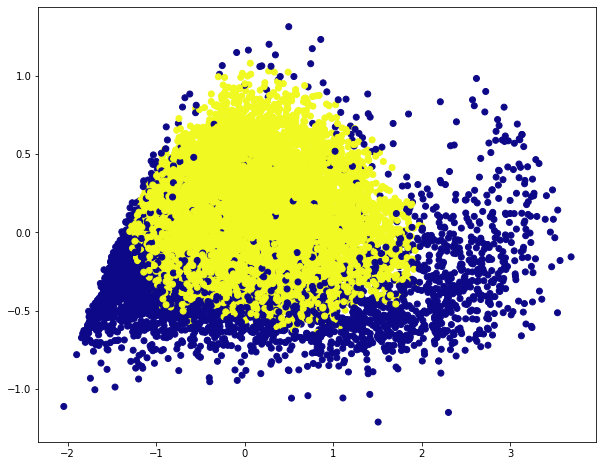

In [ ]:
dbscan = DBSCAN(eps = 0.35, min_samples = 124).fit(second_features) 
dbscan_labels = dbscan.labels_
plt.subplots(figsize=(10,8))
plt.scatter(second_features[:, 0], second_features[:,1], c = dbscan_labels, cmap= "plasma")
plt.show()

HDBSCAN:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342120 sha256=2055bbcfddd6e51f1cd4b76e68b2704efa4c3463495c60f3ed2d9a1c97b78248
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


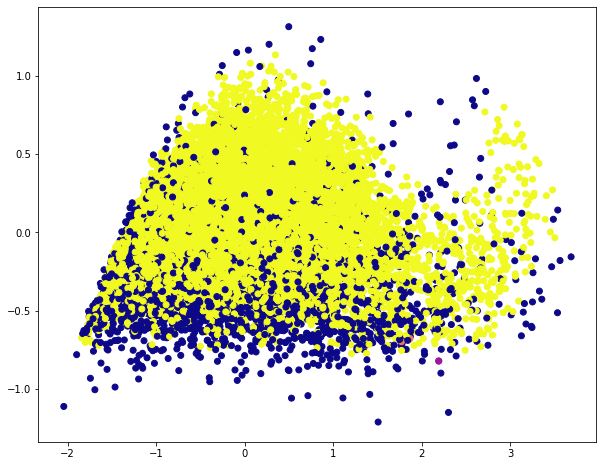

In [ ]:
#for 2 clusters:
!pip install hdbscan
import hdbscan
Hdbscan2 = hdbscan.HDBSCAN(min_cluster_size = 2, min_samples = 10).fit(second_features) 
hdbscan2_labels = Hdbscan2.labels_
plt.subplots(figsize=(10,8))
plt.scatter(second_features[:, 0], second_features[:,1], c = hdbscan2_labels, cmap= "plasma")
plt.show()

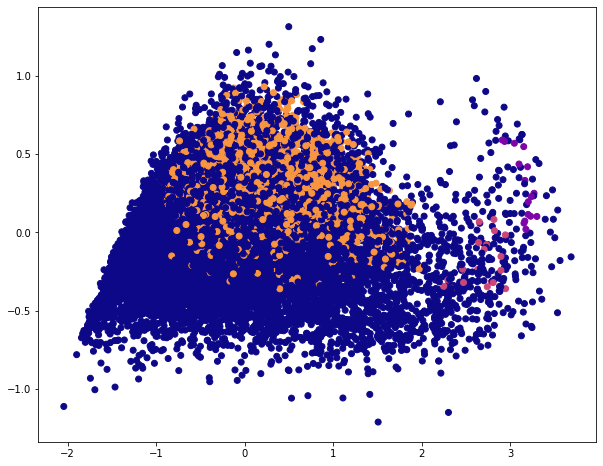

In [ ]:
#for 4 clusters:
Hdbscan4 = hdbscan.HDBSCAN(min_cluster_size = 4, min_samples = 18).fit(second_features) 
hdbscan4_labels = Hdbscan4.labels_
plt.subplots(figsize=(10,8))
plt.scatter(second_features[:, 0], second_features[:,1], c = hdbscan4_labels, cmap= "plasma")
plt.show()

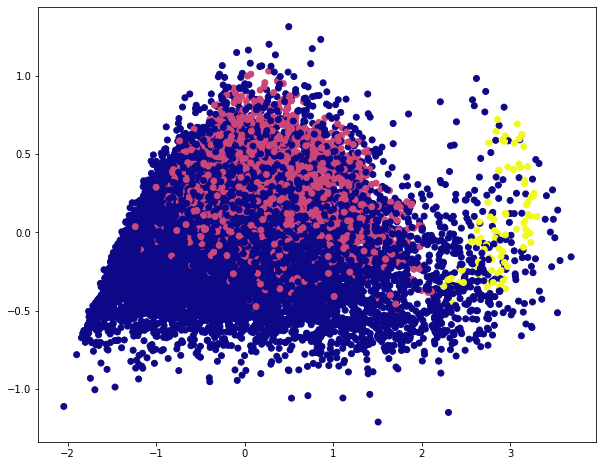

In [ ]:
#for 10 clusters
Hdbscan10 = hdbscan.HDBSCAN(min_cluster_size = 10, min_samples = 10).fit(second_features) 
hdbscan10_labels = Hdbscan10.labels_
plt.subplots(figsize=(10,8))
plt.scatter(second_features[:, 0], second_features[:,1], c = hdbscan10_labels, cmap= "plasma")
plt.show()

KMEANS:

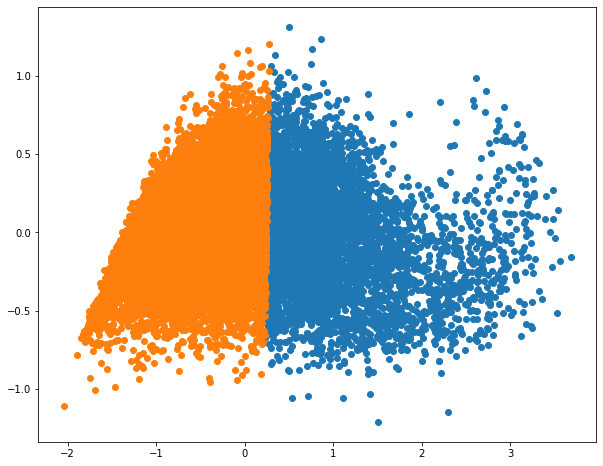

In [ ]:
#for num of clusters = 2 
Kmeans2_model = KMeans(n_clusters= 2, random_state= 42)
Kmeans2_pred = Kmeans2_model.fit_predict(second_features)
clusters_kmeans2 = unique(Kmeans2_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans2:
    row_ix = where(Kmeans2_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

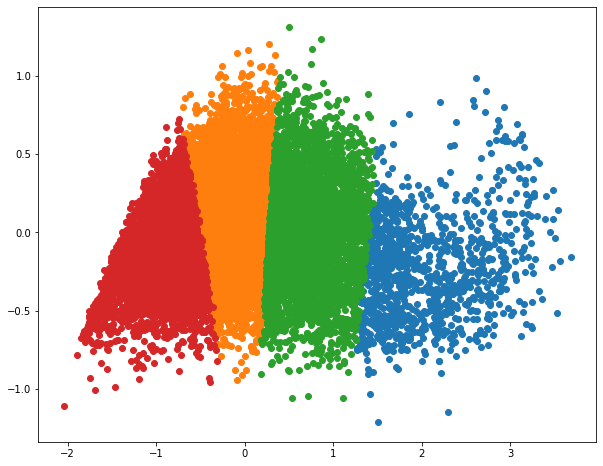

In [ ]:
#for num of clusters = 4
Kmeans4_model = KMeans(n_clusters= 4, random_state= 42)
Kmeans4_pred = Kmeans4_model.fit_predict(second_features)
clusters_kmeans4 = unique(Kmeans4_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans4:
    row_ix = where(Kmeans4_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

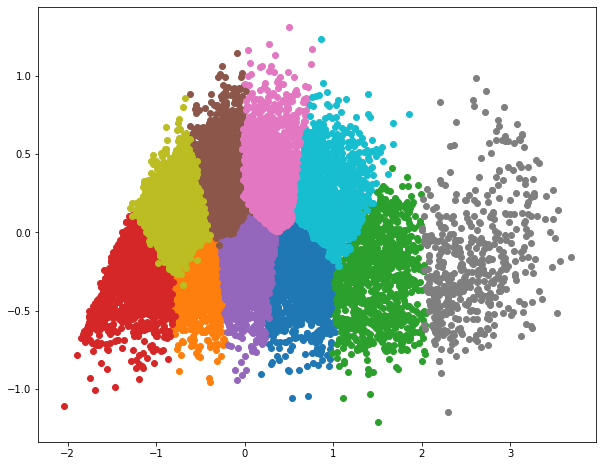

In [ ]:
#for num of clusters = 10
Kmeans10_model = KMeans(n_clusters= 10, random_state= 42)
Kmeans10_pred = Kmeans10_model.fit_predict(second_features)
clusters_kmeans10 = unique(Kmeans10_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_kmeans10:
    row_ix = where(Kmeans10_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

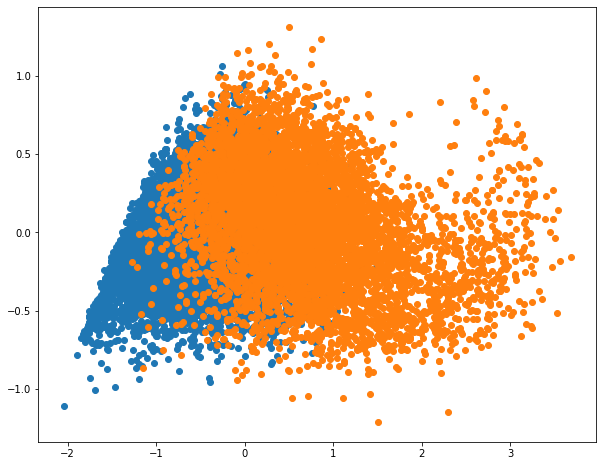

In [ ]:
#for num of clusters = 2
GMM2_model = GaussianMixture(n_components=2)
GMM2_pred = GMM2_model.fit_predict(second_features)
clusters_GMM2 = unique(GMM2_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM2:
    row_ix = where(GMM2_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

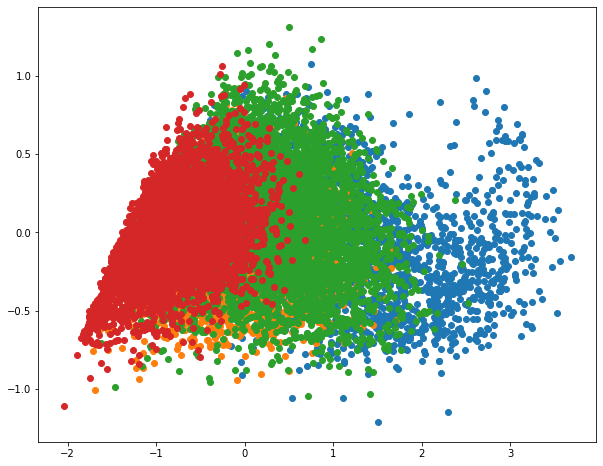

In [ ]:
#for num of clusters = 4
GMM4_model = GaussianMixture(n_components=4)
GMM4_pred = GMM4_model.fit_predict(second_features)
clusters_GMM4 = unique(GMM4_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM4:
    row_ix = where(GMM4_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

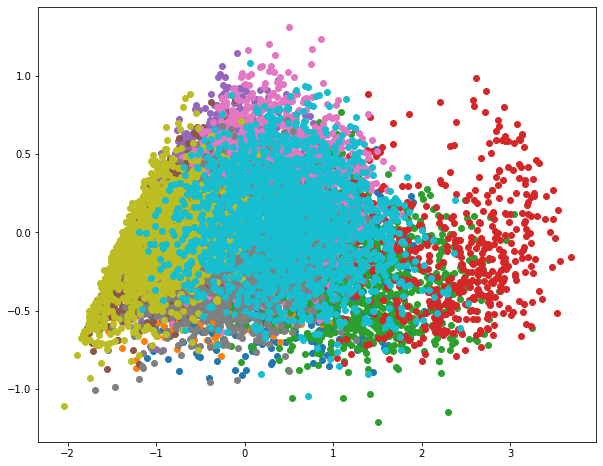

In [ ]:
#for num of clusters = 10
GMM10_model = GaussianMixture(n_components=10)
GMM10_pred = GMM10_model.fit_predict(second_features)
clusters_GMM10 = unique(GMM10_pred)
plt.subplots(figsize=(10,8))
for cluster in clusters_GMM10:
    row_ix = where(GMM10_pred == cluster)
    plt.scatter(second_features[row_ix, 0], second_features[row_ix, 1])
plt.show()

In [ ]:
#silhouette score of the models:
print("silhouette score of dbscan:", metrics.silhouette_score(second_features,dbscan_labels))
print("silhouette score of hdbscan 2:", metrics.silhouette_score(second_features,hdbscan2_labels))
print("silhouette score of hdbscan 4:", metrics.silhouette_score(second_features,hdbscan4_labels))
print("silhouette score of hdbscan 10:", metrics.silhouette_score(second_features,hdbscan10_labels))
print("silhouette score of kmeans 2:", metrics.silhouette_score(second_features,Kmeans2_pred))
print("silhouette score of kmeans 4:", metrics.silhouette_score(second_features,Kmeans4_pred))
print("silhouette score of kmeans 10:", metrics.silhouette_score(second_features,Kmeans10_pred))
print("silhouette score of GMM 2:", metrics.silhouette_score(second_features,GMM2_pred))
print("silhouette score of GMM 4:", metrics.silhouette_score(second_features,GMM4_pred))
print("silhouette score of GMM 10:", metrics.silhouette_score(second_features,GMM10_pred))

silhouette score of dbscan: 0.24809462888333075
silhouette score of hdbscan 2: 0.06221021575625356
silhouette score of hdbscan 4: -0.24070582274955551
silhouette score of hdbscan 10: -0.041688940069919606
silhouette score of kmeans 2: 0.40125791069604405
silhouette score of kmeans 4: 0.2546726609159781
silhouette score of kmeans 10: 0.1666509234059923
silhouette score of GMM 2: 0.2530010439150373
silhouette score of GMM 4: 0.038913229377365355
silhouette score of GMM 10: -0.0584968786912401


In [ ]:
# calinski harabasz score of the models:
print("calinski harabasz score of dbscan:", metrics.calinski_harabasz_score(second_features,dbscan_labels))
print("calinski harabasz score of hdbscan 2:", metrics.calinski_harabasz_score(second_features,hdbscan2_labels))
print("calinski harabasz score of hdbscan 4:", metrics.calinski_harabasz_score(second_features,hdbscan4_labels))
print("calinski harabasz score of hdbscan 10:", metrics.calinski_harabasz_score(second_features,hdbscan10_labels))
print("calinski harabasz score of kmeans 2:", metrics.calinski_harabasz_score(second_features,Kmeans2_pred))
print("calinski harabasz score of kmeans 4:", metrics.calinski_harabasz_score(second_features,Kmeans4_pred))
print("calinski harabasz score of kmeans 10:", metrics.calinski_harabasz_score(second_features,Kmeans10_pred))
print("calinski harabasz score of GMM 2:", metrics.calinski_harabasz_score(second_features,GMM2_pred))
print("calinski harabasz score of GMM 4:", metrics.calinski_harabasz_score(second_features,GMM4_pred))
print("calinski harabasz score of GMM 10:", metrics.calinski_harabasz_score(second_features,GMM10_pred))

calinski harabasz score of dbscan: 506.22646770134423
calinski harabasz score of hdbscan 2: 95.50745729940762
calinski harabasz score of hdbscan 4: 169.6274564202286
calinski harabasz score of hdbscan 10: 619.1605227317172
calinski harabasz score of kmeans 2: 14935.36689669014
calinski harabasz score of kmeans 4: 12039.959023890058
calinski harabasz score of kmeans 10: 7249.290878138621
calinski harabasz score of GMM 2: 7936.10808511462
calinski harabasz score of GMM 4: 3885.4652519578317
calinski harabasz score of GMM 10: 1852.0968794135556


In [ ]:
# davies bouldin score of the models:
print("davies bouldin score of dbscan:", metrics.davies_bouldin_score(second_features,dbscan_labels))
print("davies bouldin score of hdbscan 2:", metrics.davies_bouldin_score(second_features,hdbscan2_labels))
print("davies bouldin score of hdbscan 4:", metrics.davies_bouldin_score(second_features,hdbscan4_labels))
print("davies bouldin score of hdbscan 10:", metrics.davies_bouldin_score(second_features,hdbscan10_labels))
print("davies bouldin score of kmeans 2:", metrics.davies_bouldin_score(second_features,Kmeans2_pred))
print("davies bouldin score of kmeans 4:", metrics.davies_bouldin_score(second_features,Kmeans4_pred))
print("davies bouldin score of kmeans 10:", metrics.davies_bouldin_score(second_features,Kmeans10_pred))
print("davies bouldin score of GMM 2:", metrics.davies_bouldin_score(second_features,GMM2_pred))
print("davies bouldin score of GMM 4:", metrics.davies_bouldin_score(second_features,GMM4_pred))
print("davies bouldin score of GMM 10:", metrics.davies_bouldin_score(second_features,GMM10_pred))

davies bouldin score of dbscan: 5.026752775634968
davies bouldin score of hdbscan 2: 3.1198778623799113
davies bouldin score of hdbscan 4: 2.163204942329579
davies bouldin score of hdbscan 10: 2.930793266609374
davies bouldin score of kmeans 2: 0.9410759092395956
davies bouldin score of kmeans 4: 1.1683782190311085
davies bouldin score of kmeans 10: 1.4289886345000964
davies bouldin score of GMM 2: 1.3092177215329284
davies bouldin score of GMM 4: 2.117127532543442
davies bouldin score of GMM 10: 3.313212799235283


In [ ]:
#rand index for models:
print("rand index of dbscan:", metrics.adjusted_rand_score(genders,dbscan_labels))
print("rand index of hdbscan 2:", metrics.adjusted_rand_score(genders,hdbscan2_labels))
print("rand index of hdbscan 4:", metrics.adjusted_rand_score(genders,hdbscan4_labels))
print("rand index of hdbscan 10:", metrics.adjusted_rand_score(genders,hdbscan10_labels))
print("rand index of kmeans 2:", metrics.adjusted_rand_score(genders,Kmeans2_pred))
print("rand index of kmeans 4:", metrics.adjusted_rand_score(emotions,Kmeans4_pred))
print("rand index of kmeans 10:", metrics.adjusted_rand_score(text_ID,Kmeans10_pred))
print("rand index of GMM 2:", metrics.adjusted_rand_score(genders,GMM2_pred))
print("rand index of GMM 4:", metrics.adjusted_rand_score(emotions,GMM4_pred))
print("rand index of GMM 10:", metrics.adjusted_rand_score(text_ID,GMM10_pred))

rand index of dbscan: 4.265433675148219e-05
rand index of hdbscan 2: -0.0001646094791631494
rand index of hdbscan 4: 0.0045720711853102555
rand index of hdbscan 10: 0.005766064787364491
rand index of kmeans 2: 0.0025009058334804395
rand index of kmeans 4: 0.009991732055262341
rand index of kmeans 10: 0.02544958849468978
rand index of GMM 2: 0.004395630051311511
rand index of GMM 4: 0.009013527155037896
rand index of GMM 10: 0.06036364054380597


In [ ]:
#Mutual Information score for models:
print("mutual information score of dbscan:", metrics.mutual_info_score(genders,dbscan_labels))
print("mutual information score of hdbscan 2:", metrics.mutual_info_score(genders,hdbscan2_labels))
print("mutual information score of hdbscan 4:", metrics.adjusted_rand_score(genders,hdbscan4_labels))
print("mutual information score of hdbscan 10:", metrics.adjusted_rand_score(genders,hdbscan10_labels))
print("mutual information score of kmeans 2:", metrics.mutual_info_score(genders,Kmeans2_pred))
print("mutual information score of kmeans 4:", metrics.mutual_info_score(emotions,Kmeans4_pred))
print("mutual information score of kmeans 10:", metrics.mutual_info_score(text_ID,Kmeans10_pred))
print("mutual information score of GMM 2:", metrics.mutual_info_score(genders,GMM2_pred))
print("mutual information score of GMM 4:", metrics.mutual_info_score(emotions,GMM4_pred))
print("mutual information score of GMM 10:", metrics.mutual_info_score(text_ID,GMM10_pred))

mutual information score of dbscan: 0.0012584796445544166
mutual information score of hdbscan 2: 0.001742693938171119
mutual information score of hdbscan 4: 0.0045720711853102555
mutual information score of hdbscan 10: 0.005766064787364491
mutual information score of kmeans 2: 0.0009033827559828955
mutual information score of kmeans 4: 0.017297041990934903
mutual information score of kmeans 10: 0.11151861717221759
mutual information score of GMM 2: 0.0018491823109499372
mutual information score of GMM 4: 0.01389310789852527
mutual information score of GMM 10: 0.23223063359894802


In [ ]:
#Homogenity score for models:
print("homogenity score of dbscan:", metrics.homogeneity_score(genders,dbscan_labels))
print("homogenity score of hdbscan 2:", metrics.homogeneity_score(genders,hdbscan2_labels))
print("homogenity score of hdbscan 4:", metrics.homogeneity_score(genders,hdbscan4_labels))
print("homogenity score of hdbscan 10:", metrics.homogeneity_score(genders,hdbscan10_labels))
print("homogenity score of kmeans 2:", metrics.homogeneity_score(genders,Kmeans2_pred))
print("homogenity score of kmeans 4:", metrics.homogeneity_score(emotions,Kmeans4_pred))
print("homogenity score of kmeans 10:", metrics.homogeneity_score(text_ID,Kmeans10_pred))
print("homogenity score of GMM 2:", metrics.homogeneity_score(genders,GMM2_pred))
print("homogenity score of GMM 4:", metrics.homogeneity_score(emotions,GMM4_pred))
print("homogenity score of GMM 10:", metrics.homogeneity_score(text_ID,GMM10_pred))

homogenity score of dbscan: 0.0018172005747941334
homogenity score of hdbscan 2: 0.0025163890729882014
homogenity score of hdbscan 4: 0.003107895377083114
homogenity score of hdbscan 10: 0.0037946179327212792
homogenity score of kmeans 2: 0.0013044530918992089
homogenity score of kmeans 4: 0.012477224783362781
homogenity score of kmeans 10: 0.048323221598496856
homogenity score of GMM 2: 0.002670154557443912
homogenity score of GMM 4: 0.010021796228526314
homogenity score of GMM 10: 0.10063012485198787


In [ ]:
#v-measure score for models:
print("v-measure score of dbscan:", metrics.homogeneity_score(genders,dbscan_labels))
print("v-measure score of hdbscan 2:", metrics.homogeneity_score(genders,hdbscan2_labels))
print("v-measure score of hdbscan 4:", metrics.homogeneity_score(genders,hdbscan4_labels))
print("v-measure score of hdbscan 10:", metrics.homogeneity_score(genders,hdbscan10_labels))
print("v-measure score of kmeans 2:", metrics.homogeneity_score(genders,Kmeans2_pred))
print("v-measure score of kmeans 4:", metrics.homogeneity_score(emotions,Kmeans4_pred))
print("v-measure score of kmeans 10:", metrics.homogeneity_score(text_ID,Kmeans10_pred))
print("v-measure score of GMM 2:", metrics.homogeneity_score(genders,GMM2_pred))
print("v-measure score of GMM 4:", metrics.homogeneity_score(emotions,GMM4_pred))
print("v-measure score of GMM 10:", metrics.homogeneity_score(text_ID,GMM10_pred))

v-measure score of dbscan: 0.0018172005747941334
v-measure score of hdbscan 2: 0.0025163890729882014
v-measure score of hdbscan 4: 0.003107895377083114
v-measure score of hdbscan 10: 0.0037946179327212792
v-measure score of kmeans 2: 0.0013044530918992089
v-measure score of kmeans 4: 0.012477224783362781
v-measure score of kmeans 10: 0.048323221598496856
v-measure score of GMM 2: 0.002670154557443912
v-measure score of GMM 4: 0.010021796228526314
v-measure score of GMM 10: 0.10063012485198787
